In [1]:
import numpy as np
from sklearn.neighbors import KDTree
import map_elites.cvt as cvt_map_elites
import map_elites.common as cm_map_elites
import cairo
from PIL import Image
import matplotlib.pyplot as plt 

In [2]:
def load_data(filename, dim,dim_x):
    print("Loading ",filename)
    data = np.loadtxt(filename)
    fit = data[:, 0:1]
    cent = data[:,1: dim+1]
    desc = data[:,dim+1: 2*dim+1]
    x = data[:,2*dim+1:2*dim+1+dim_x]
    
def load_centroids(filename):
    points = np.loadtxt(filename)
    return points

def make_hashable(array):
    return tuple(map(float, array))

def getKDT(n_niches, dim_map, number):

    fname = "centroids_{}.dat".format(number)
    c = np.loadtxt(fname)
    kdt = KDTree(c, leaf_size=30, metric='euclidean')
    return kdt

def draw(geno):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 10, 10)
    ctx = cairo.Context(surface)
    ctx.set_source_rgba(geno[0], geno[1], geno[2], 1)
    ctx.paint()
    return surface 
        
def pilImageFromCairoSurface( surface ):
    cairoFormat = surface.get_format()
    if cairoFormat == cairo.FORMAT_ARGB32:
        pilMode = 'RGB'
        # Cairo has ARGB. Convert this to RGB for PIL which supports only RGB or
        # RGBA.
        argbArray = np.frombuffer( surface.get_data().tobytes(), 'c' ).reshape( -1, 4 )
        rgbArray = argbArray[ :, 2::-1 ]
        pilData = rgbArray.reshape( -1 ).tobytes()
    else:
        raise ValueError( 'Unsupported cairo format: %d' % cairoFormat )
    pilImage = Image.frombuffer( pilMode,
    ( surface.get_width(), surface.get_height() ), pilData, "raw", pilMode, 0, 1 )
    pilImage = pilImage.convert( 'RGB' )
    return pilImage        

985
Percentage archive fill: 985.0


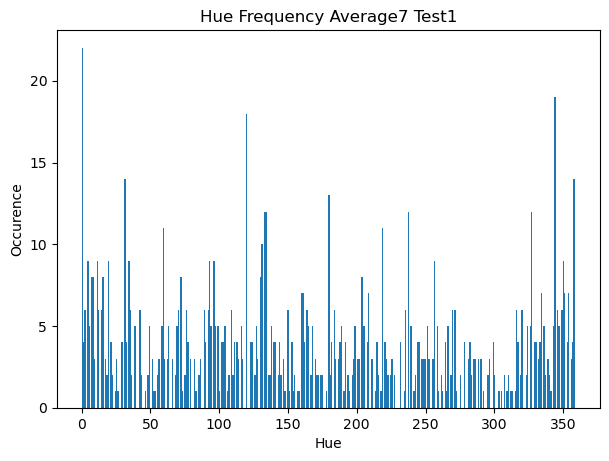

In [3]:
if __name__ == "__main__":
    
    archive_fill = []
    hues = []
    #for k in range(1,10):
        
    centroids = load_centroids("centroids_{}.dat".format(2))
    data = np.loadtxt("archive_{}.dat".format(2))
    fit = data[:,0:1]
    cent = data[:, 1:3]
    desc = data[:, 3: 5]
    geno = data[:, 5: 9]   

    percentage = len(fit)
    print(percentage)
    archive_fill.append(percentage)

    for i in range(0,len(fit)):
        img = draw(geno[i])
        imgP = Image.frombuffer("RGBA",(img.get_width(),img.get_height() ),img.get_data(),"raw","RGBA",0,1)
        img_HSV = imgP.convert('HSV')
        img_HSV_arr = np.array(img_HSV)
        hue = np.mean(img_HSV_arr[:,:,0])*360 / 255

        hues.append(hue)
            
    tot_filled = sum(archive_fill) / len(archive_fill)
    print("Percentage archive fill: {}".format(tot_filled))
            
    #print(hues)
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

    # Plot Histogram on x
    x = hues
    plt.hist(x, bins=360)
    #plt.gca().set(title='Hue Frequency MaxDist7', ylabel='Occurrence', xlabel= 'Hue')
    plt.xlabel('Hue')
    plt.ylabel('Occurence')
    plt.title("Hue Frequency Average7 Test1")
    #plt.savefig("Hue_Histogram_MaxDist7.png")

983
985
986
986
987
980
984
986
987
Percentage archive fill: 984.8888888888889


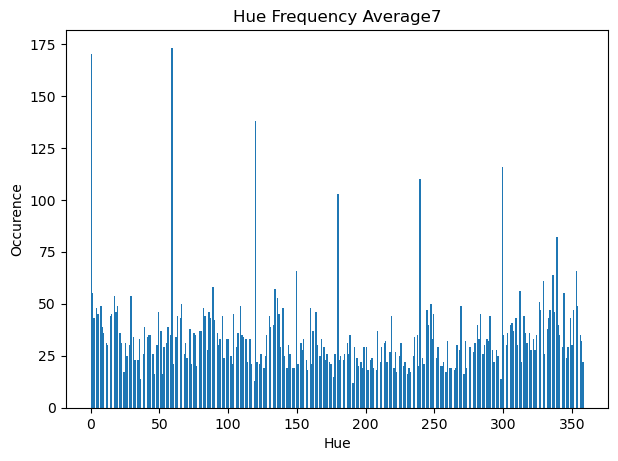

In [3]:
if __name__ == "__main__":
    
    archive_fill = []
    hues = []
    for k in range(1,10):
        
        centroids = load_centroids("centroids_{}.dat".format(k))
        data = np.loadtxt("archive_{}.dat".format(k))
        fit = data[:,0:1]
        cent = data[:, 1:3]
        desc = data[:, 3: 5]
        geno = data[:, 5: 9]
        
        percentage = len(fit)
        print(percentage)
        archive_fill.append(percentage)
        
        for i in range(0,len(fit)):
            img = draw(geno[i])
            imgP = Image.frombuffer("RGBA",(img.get_width(),img.get_height() ),img.get_data(),"raw","RGBA",0,1)
            img_HSV = imgP.convert('HSV')
            img_HSV_arr = np.array(img_HSV)
            hue = np.mean(img_HSV_arr[:,:,0])*360 / 255

            hues.append(hue)
    
    tot_filled = sum(archive_fill) / len(archive_fill)
    print("Percentage archive fill: {}".format(tot_filled))
    #print(hues)
    plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

    # Plot Histogram on x
    x = hues
    plt.hist(x, bins=360)
    #plt.gca().set(title='Hue Frequency Average7', ylabel='Occurrence', xlabel= 'Hue')
    plt.xlabel('Hue')
    plt.ylabel('Occurence')
    plt.title("Hue Frequency Average7")
    plt.savefig("Hue_Histogram_Average7.png")

In [4]:
if __name__ == "__main__":

    similarity_geno = []
    similarity_pheno = []
    for k in range(1,10):
        
        centroids = load_centroids("centroids_{}.dat".format(k))
        data = np.loadtxt("archive_{}.dat".format(k))
        fit = data[:,0:1]
        cent = data[:, 1:3]
        desc = data[:, 3: 5]
        geno = data[:, 5: 9]
        #print("Fit: {}".format(fit[0]))
        #print("Cent: {}".format(cent[0]))
        #print("Behavior: {}".format(desc[0]))
        #print("Geno: {}".format(geno[0]))

        test1 = np.array([0, 0, 0])
        test2 = np.array([1, 1, 1])
        max_pos = np.linalg.norm(test1- test2)
        #print("Maximum possible distance: {}".format(max_pos))

        pair_dist_geno = []
        pair_dist_pheno = []
        for i in range(0, len(fit)):
            for j in range(0, len(fit)):
                dist_geno = np.linalg.norm(geno[i] - geno[j])
                pair_dist_geno.append(dist_geno / max_pos)
                
                img_uno = draw(geno[i])
                img_due = draw(geno[j])
                imgP1 = pilImageFromCairoSurface(img_uno)
                imgP2 = pilImageFromCairoSurface(img_due)
                img_HSV_uno = imgP1.convert('HSV')
                img_HSV_due = imgP2.convert('HSV')
                img_HSV_arr_uno = np.array(img_HSV_uno)
                img_HSV_arr_due = np.array(img_HSV_due)
                one = [img_HSV_arr_uno[5,5,0]/255, img_HSV_arr_uno[5,5,1]/255, img_HSV_arr_uno[5,5,2]/255]
                two = [img_HSV_arr_due[5,5,0]/255, img_HSV_arr_due[5,5,1]/255, img_HSV_arr_due[5,5,2]/255]
                one = np.array(one)
                two = np.array(two)
                dist_pheno = np.linalg.norm(one - two)
                pair_dist_pheno.append(dist_pheno / max_pos)
                
        similarity_geno.append(sum(pair_dist_geno) / len(pair_dist_geno))
        similarity_pheno.append(sum(pair_dist_pheno) / len(pair_dist_pheno))
        
    sim_geno = sum(similarity_geno)/len(similarity_geno)
    sim_pheno = sum(similarity_pheno)/len(similarity_pheno)
    
    print("Similarity geno : {}".format(sim_geno))
    print("Similarity pheno : {}".format(sim_pheno))

Similarity geno : 0.3368034585486883
Similarity pheno : 0.37199190815544614
